# Import necessary libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Importing Dataset

In [45]:
data_df=pd.read_csv('C:\\Users\\rajpu\\Downloads\\archive (6)\\IRIS.csv')

# Let's take a look at the first few rows of the dataset

In [46]:
data_df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Count Null values

In [47]:
data_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

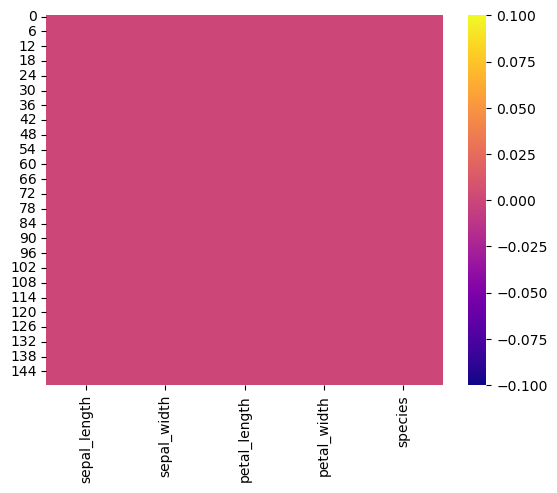

In [48]:
sns.heatmap(data_df.isnull(),cmap='plasma')

# Check column types

In [49]:
data_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# Convert non-numeric columns to numeric

In [50]:
data_df['sepal_length'] = pd.to_numeric(data_df['sepal_length'],errors='coerce')
data_df['sepal_width'] = pd.to_numeric(data_df['sepal_width'],errors='coerce')
data_df['petal_length'] = pd.to_numeric(data_df['petal_length'],errors='coerce')
data_df['petal_width'] = pd.to_numeric(data_df['petal_width'],errors='coerce')

# Encode categorical column

In [51]:
label_encoder = LabelEncoder()
data_df['species'] = label_encoder.fit_transform(data_df['species'])

# Define features and target variable

In [52]:
X = data_df[['sepal_length','sepal_width','petal_length','petal_width']]
y=data_df['species']

# Split the data into training and testing sets

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Random Forest model

In [55]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Make prediction

In [56]:
y_pred= model.predict(X_test)

# Evaluate the model

In [58]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [60]:
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [62]:
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [64]:
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

